In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df = pd.read_csv('city_day (1).csv')

In [ ]:
df.dtypes

City             object
Date             object
PM2.5           float64
PM10            float64
NO              float64
NO2             float64
NOx             float64
NH3             float64
CO              float64
SO2             float64
O3              float64
Benzene         float64
Toluene         float64
Xylene          float64
AQI             float64
AQI_Bucket       object
CO_noisy        float64
PM10_drifted    float64
dtype: object

In [ ]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [ ]:
df.tail()

City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  0.47   8.55  23.30     2.24    12.07    0.73  41.0          Good  
29527  0.52  12.72  30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528  0.48   8.42  30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529  0.52   9.84  28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530  0.59   2.10  17.05      NaN      NaN     NaN  50.0          Good

In [ ]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [ ]:
df.shape

(29531, 16)

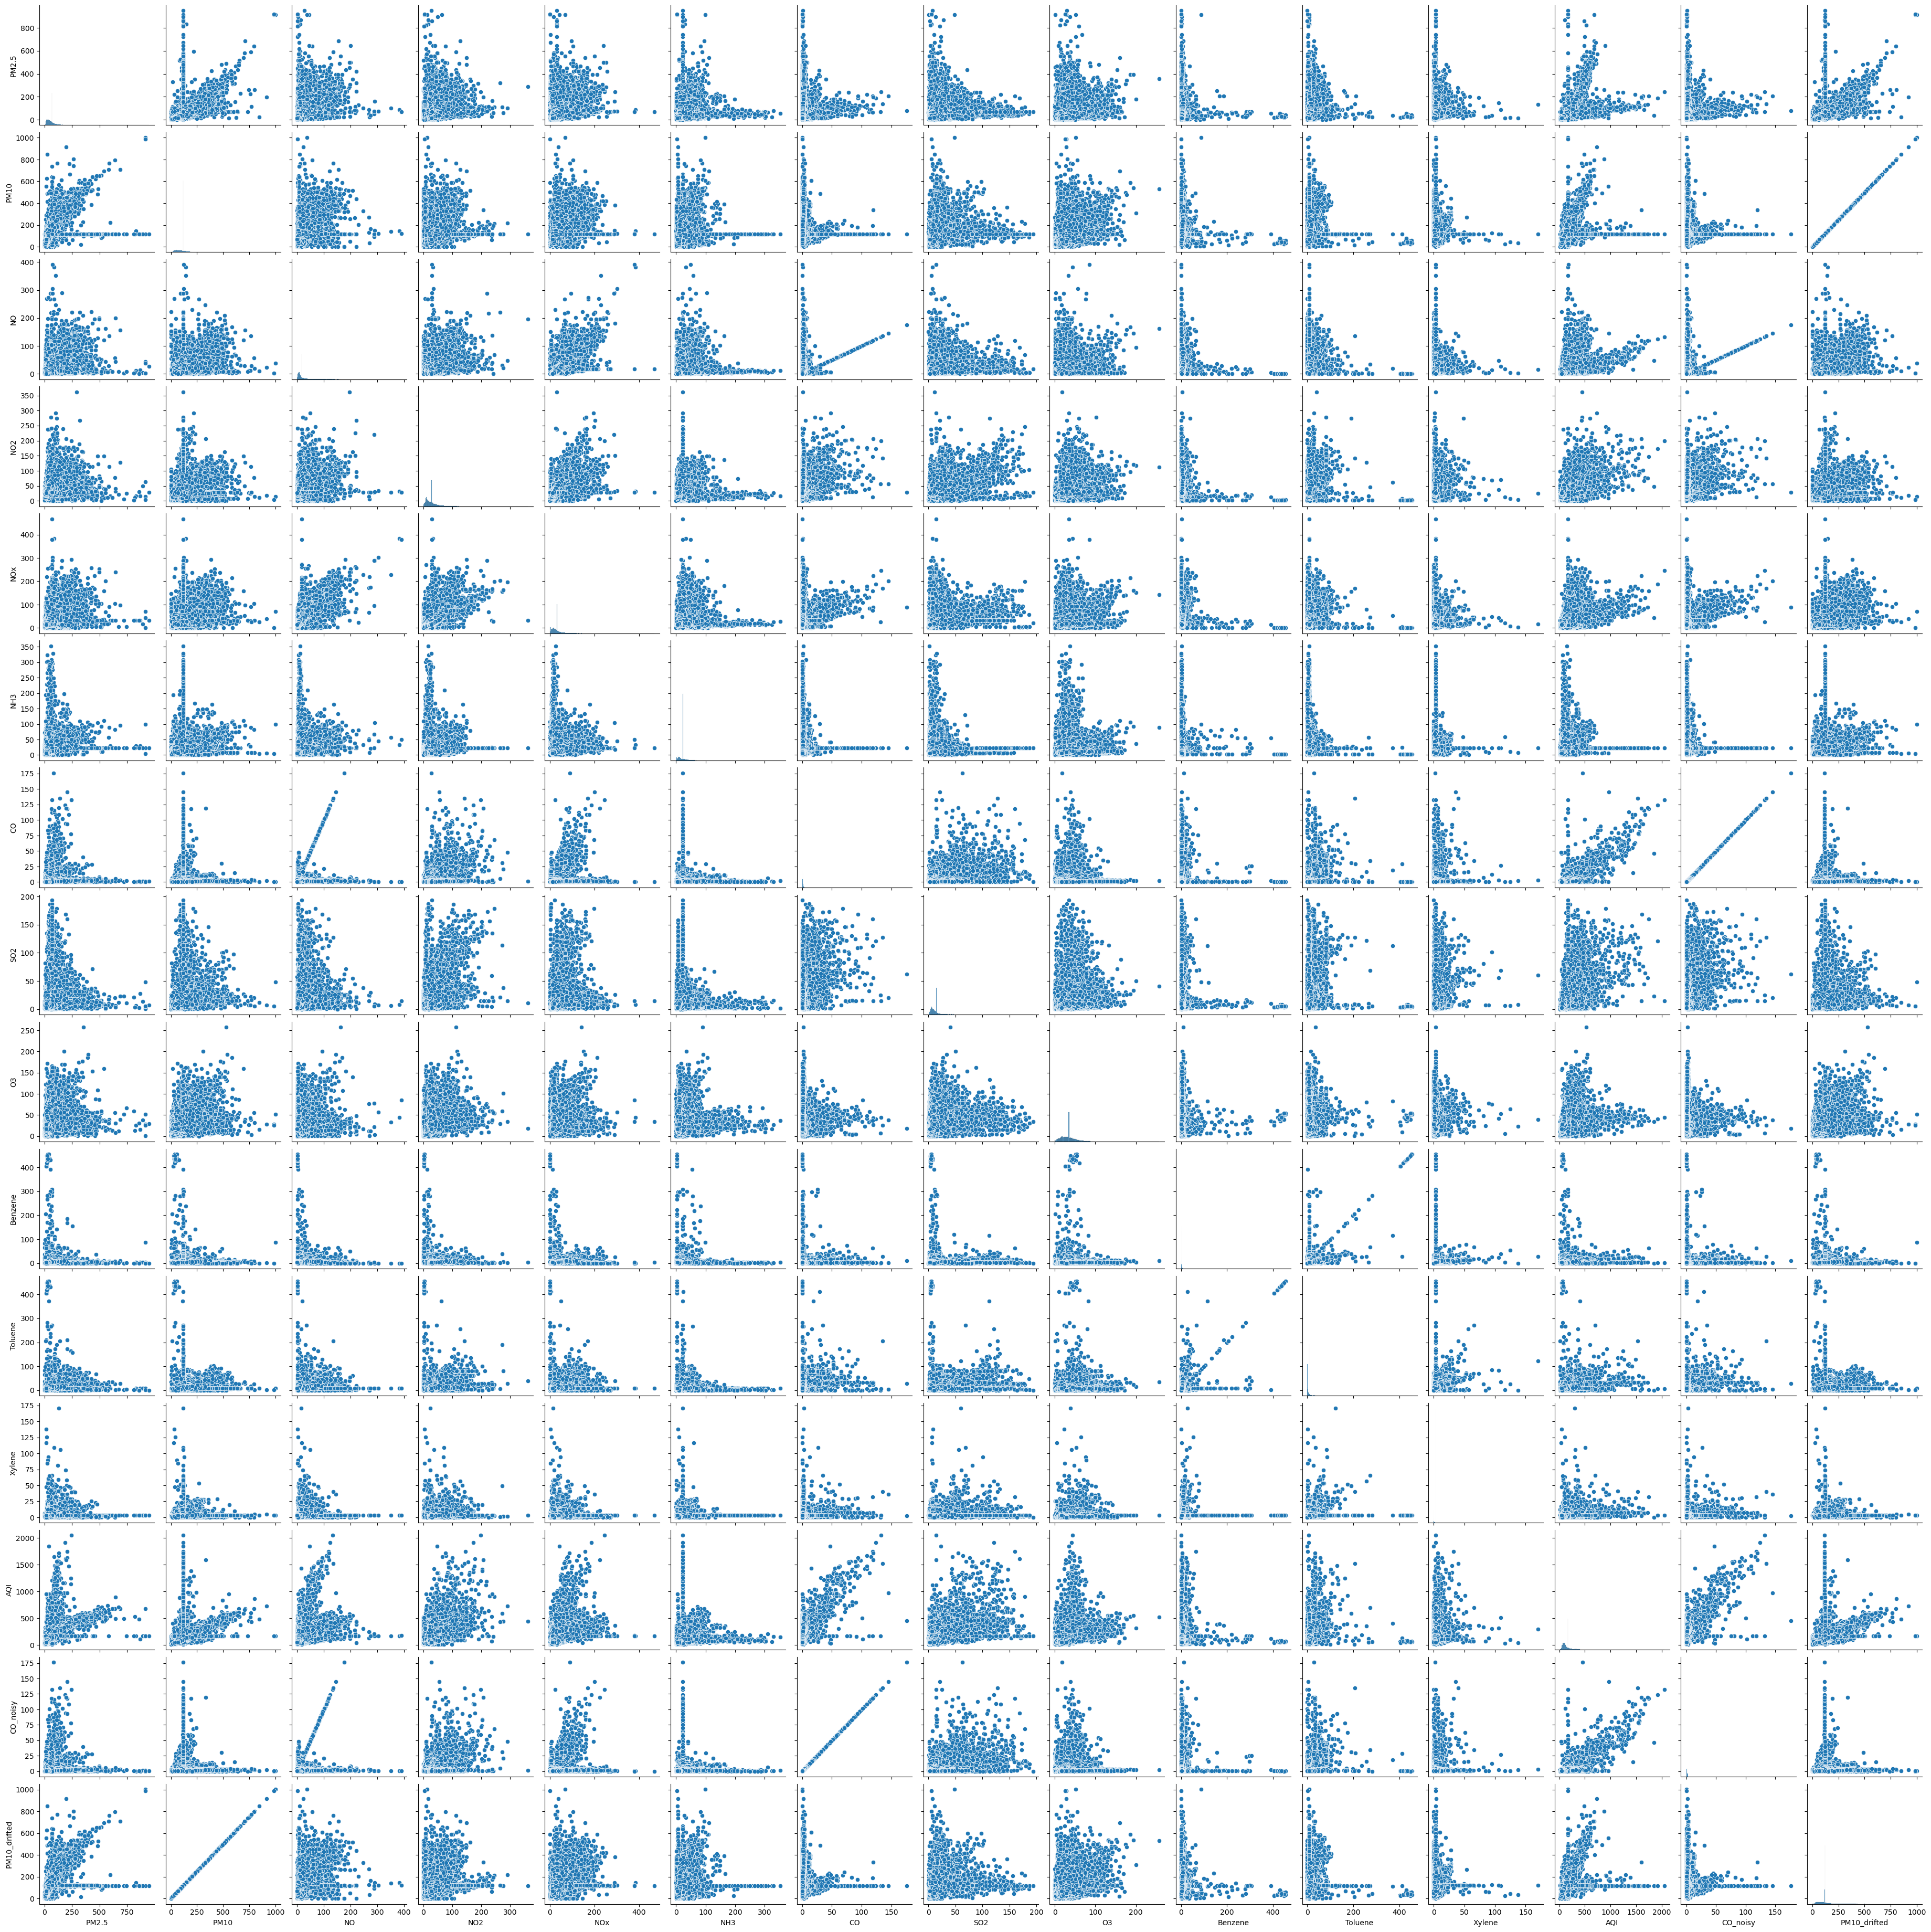

In [ ]:
sns.pairplot(df)
plt.show()

<Axes: >

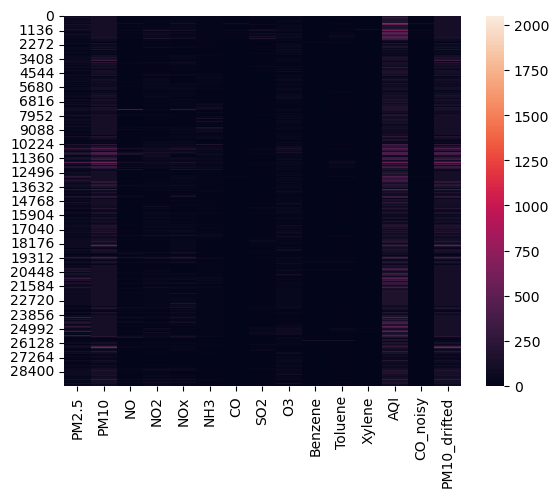

In [ ]:
num = df.select_dtypes(include=[np.number])
sns.heatmap(num)

In [ ]:
df['City'].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

[]

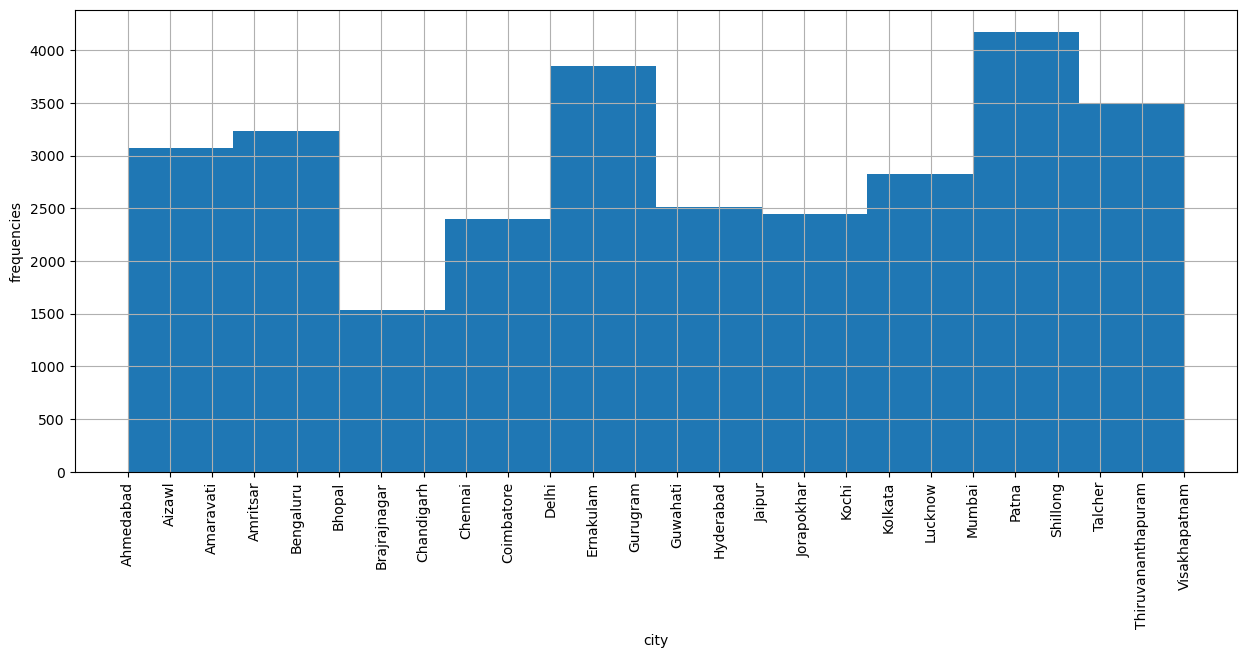

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.City.hist()
plt.xlabel('city')
plt.ylabel('frequencies')
plt.plot()

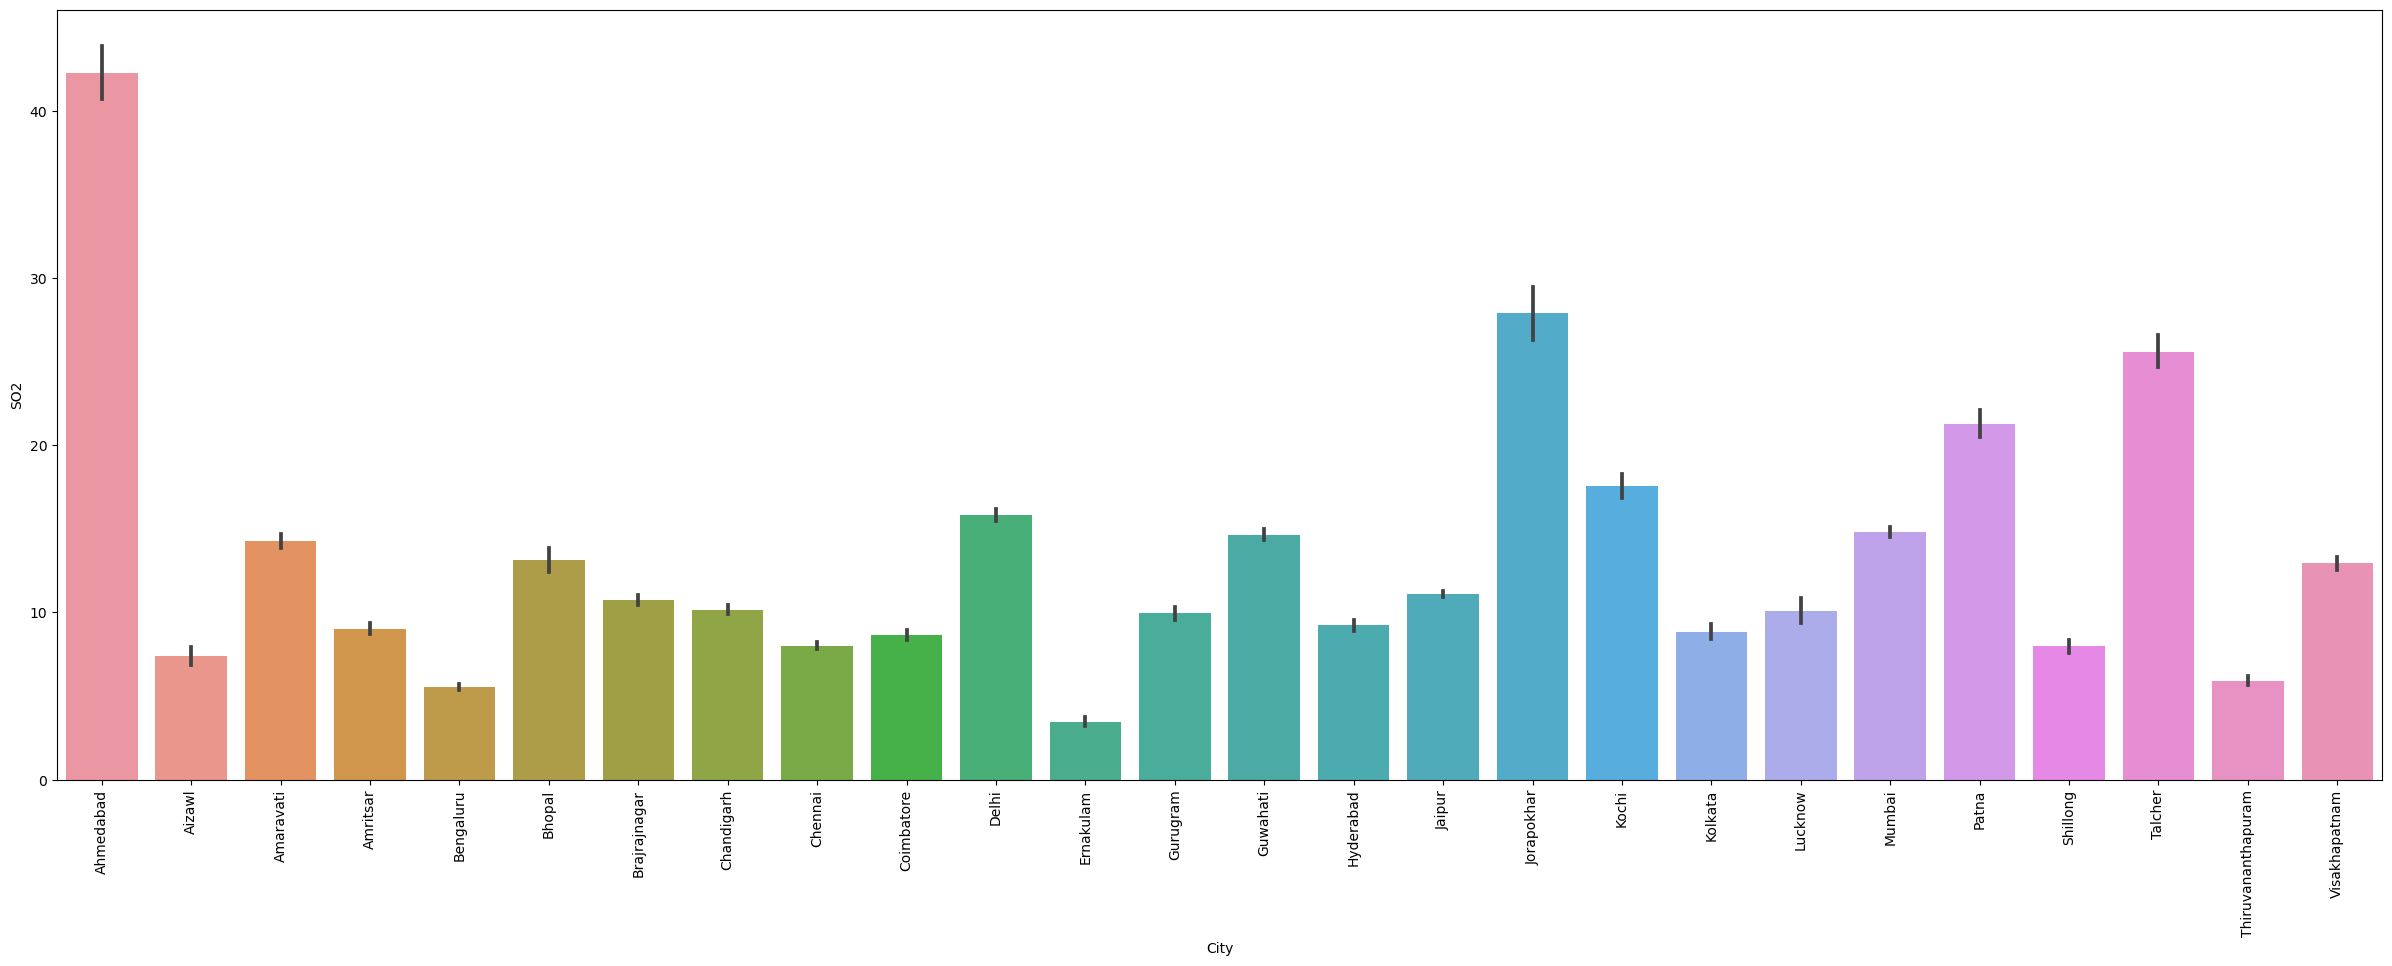

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='SO2',data=df);

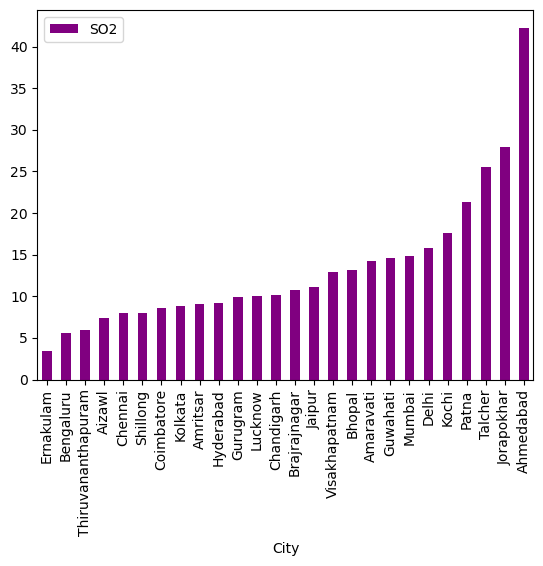

In [ ]:
df[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2').plot.bar(color='purple')
plt.show()

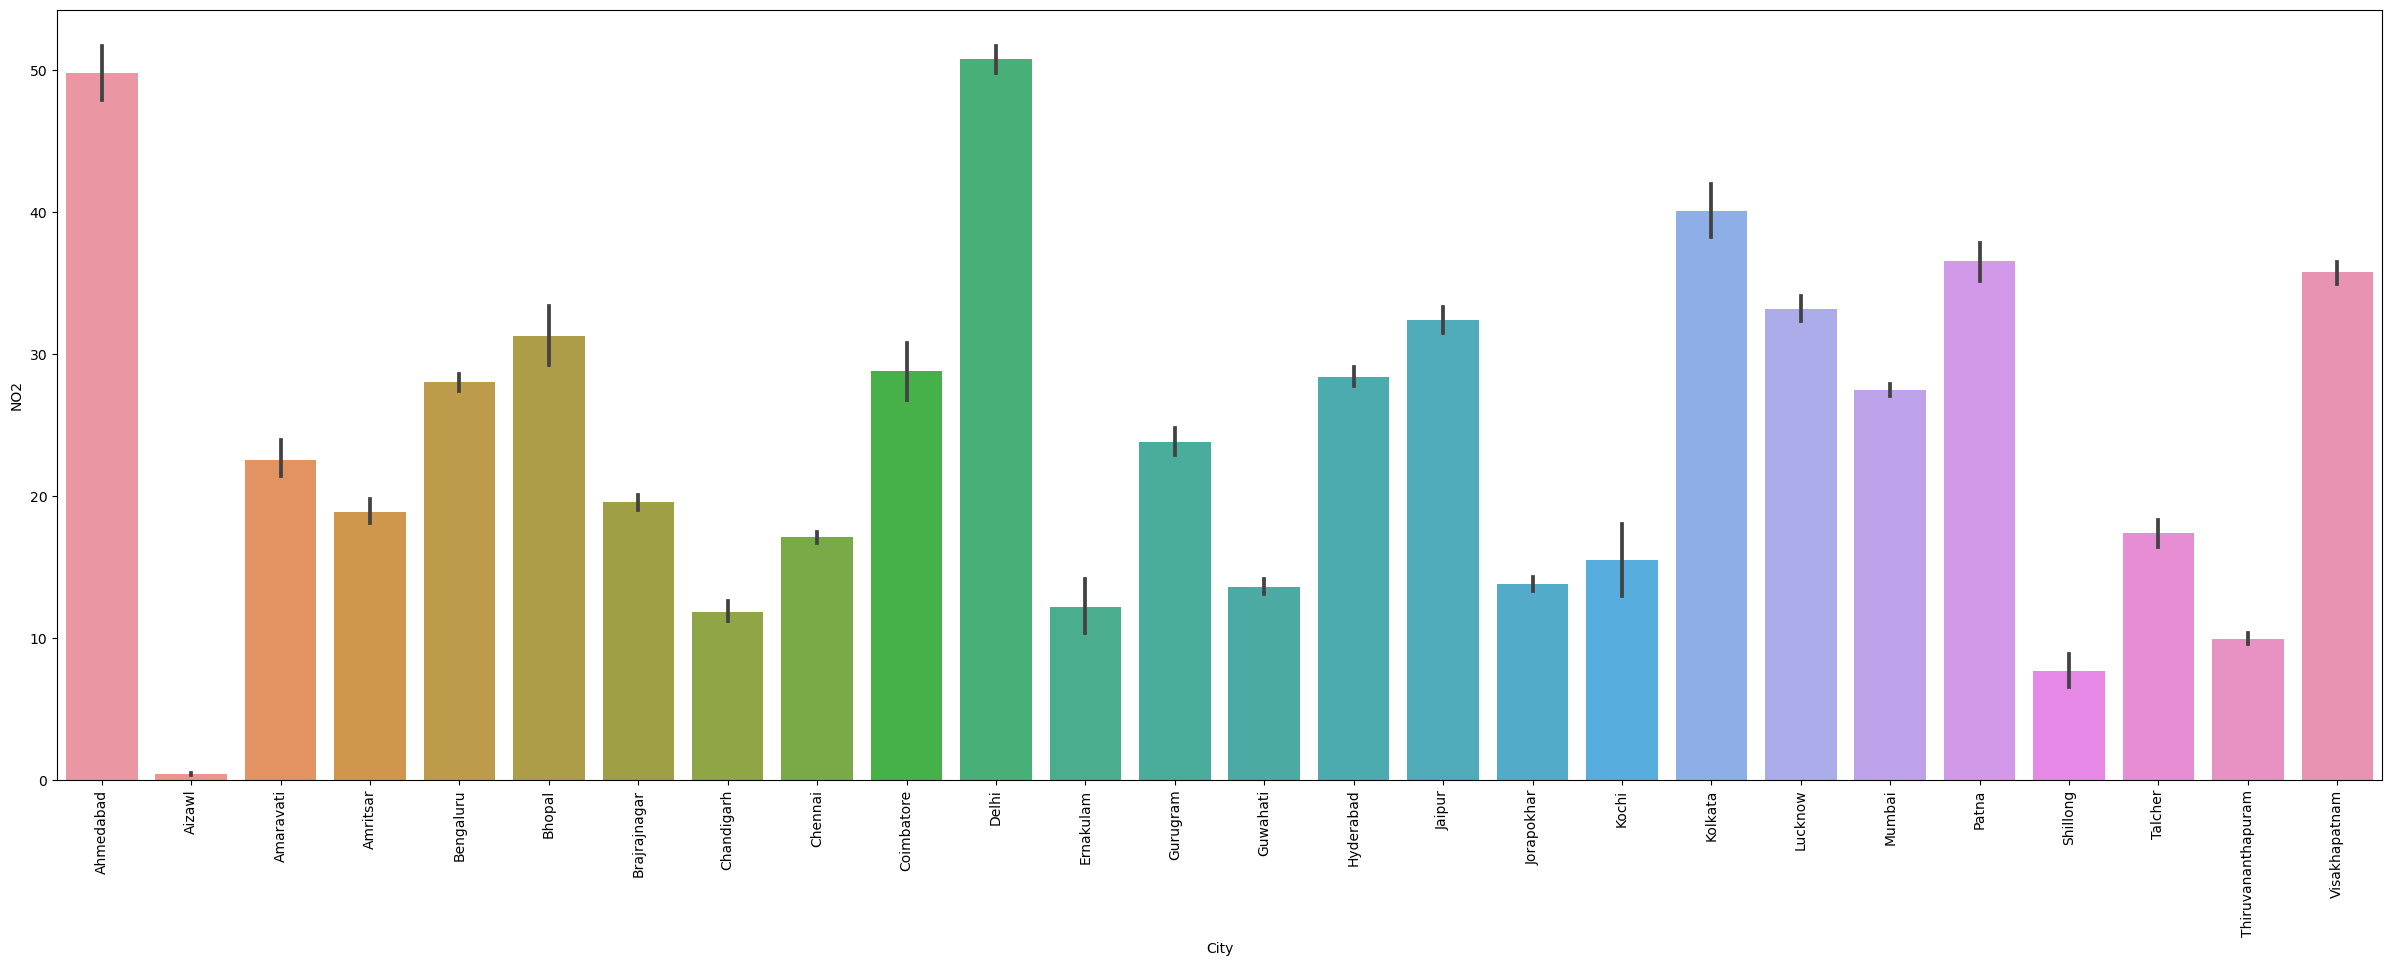

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NO2',data=df);

In [ ]:
noise_scale=0.1
df['CO_noisy']=df['CO']+np.random.normal(0,noise_scale,size=len(df))

In [ ]:
drift_amount = np.linspace(0,2,num=len(df))
df['PM10_drifted']=df['PM10']+drift_amount

In [ ]:
features = ['CO_noisy','PM10_drifted']
target='PM2.5'
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],
                                               test_size=0.2, random_state=42)

In [ ]:
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'mean squared error of linear regression :{mse_lr}')

mean squared error of linear regression :2166.6476751907726


Text(0, 0.5, 'Predicted PM2.5')

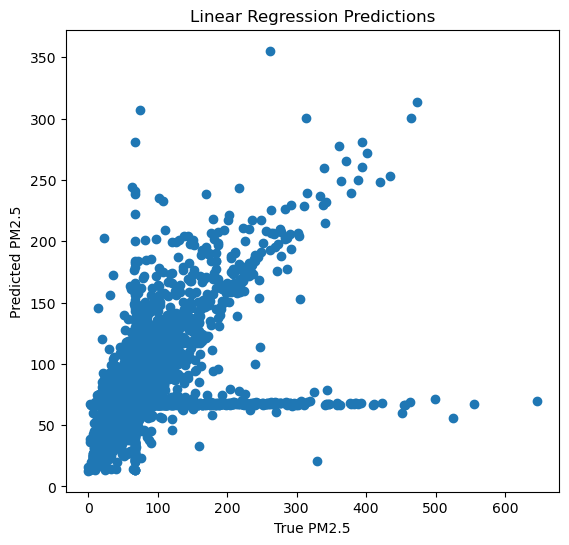

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Linear Regression Predictions')
plt.scatter(y_test, y_pred_lr)
plt.xlabel('True PM2.5')
plt.ylabel('Predicted PM2.5')


In [ ]:
#fit the model on train data
RF=RandomForestRegressor().fit(X_train,y_train)
#predict on train
train_preds4 = RF.predict(X_train)
train_mae = mean_absolute_error(y_train, train_preds4)
train_mse = mean_squared_error(y_train, train_preds4)
train_r2 = r2_score(y_train, train_preds4)

print("Model Mean Absolute Error on train is: ", train_mae)
print("Model Mean Squared Error on train is: ", train_mse)
print("Model R^2 score on train is: ", train_r2)

# Predict on test
test_preds4 = RF.predict(X_test)

# Calculate and print regression metrics on test
test_mae = mean_absolute_error(y_test, test_preds4)
test_mse = mean_squared_error(y_test, test_preds4)
test_r2 = r2_score(y_test, test_preds4)

print("Model Mean Absolute Error on test is: ", test_mae)
print("Model Mean Squared Error on test is: ", test_mse)
print("Model R^2 score on test is: ", test_r2)

Model Mean Absolute Error on train is:  6.203295075502505
Model Mean Squared Error on train is:  169.12799487515704
Model R^2 score on train is:  0.9529005676368725
Model Mean Absolute Error on test is:  17.418362423519874
Model Mean Squared Error on test is:  1143.2556082750868
Model R^2 score on test is:  0.6520945251095458
